In [5]:
# notebooks/eda_nyc_taxi.ipynb
! pip install seaborn

# --- 1. Importar librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\nazar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

# Ruta del archivo Parquet de entrada
input_path = "C:/Users/nazar/OneDrive/Documentos/EDA/yellow_tripdata_2023-01.parquet"

# Ruta del archivo CSV de salida
output_path = "C:/Users/nazar/OneDrive/Documentos/EDA/yellow_tripdata_2023-01.csv"

# Leer el archivo Parquet
df = pd.read_parquet(input_path)

# Guardar como CSV
df.to_csv(output_path, index=False)

print("✅ Conversión completada. Archivo guardado como CSV.")


✅ Conversión completada. Archivo guardado como CSV.


In [7]:
import pandas as pd

input_path = "C:/Users/nazar/OneDrive/Documentos/EDA/yellow_tripdata_2023-01.parquet"
df = pd.read_parquet(input_path, engine='pyarrow')

# Seleccionar solo las primeras 50,000 filas por ejemplo
df_sample = df.head(50000)

# Guardar la muestra como CSV
output_path = "C:/Users/nazar/OneDrive/Documentos/EDA/yellow_trip_sample.csv"
df_sample.to_csv(output_path, index=False)

print("✅ Archivo reducido guardado como CSV.")


✅ Archivo reducido guardado como CSV.


In [8]:


# Estilo de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ---  Cargar el dataset ---
file_path = "C:/Users/nazar/OneDrive/Documentos/EDA/yellow_tripdata_2023-01.csv"
df = pd.read_csv(file_path, low_memory=False)

# ---  Vista general ---
print("Shape (filas, columnas):", df.shape)
display(df.head())

# ---  Información general ---
df.info()

# ---  Ver columnas ---
print("\nColumnas del dataset:")
print(df.columns.tolist())


Shape (filas, columnas): (3066766, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 444.6+ MB

Columnas del dataset:
['VendorID', 'tpep_pickup_datetime', 'tpep_

Celda 1: Análisis de trip_distance

Descripción estadística de 'trip_distance':
count    3.066766e+06
mean     3.847342e+00
std      2.495838e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.800000e+00
75%      3.330000e+00
max      2.589281e+05
Name: trip_distance, dtype: float64


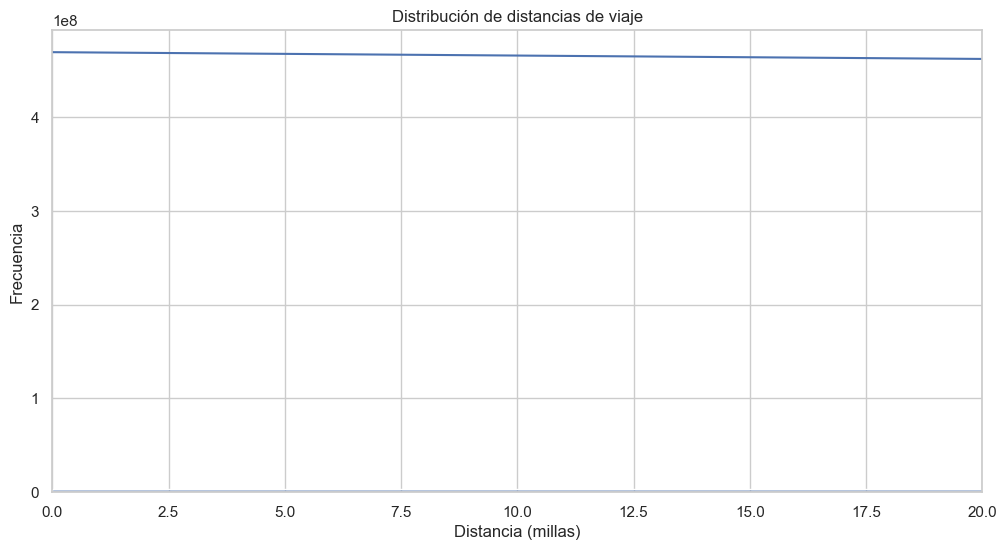

In [9]:
# --- Análisis univariado: trip_distance ---
print("Descripción estadística de 'trip_distance':")
print(df['trip_distance'].describe())

# Histograma de distancias
plt.figure()
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Distribución de distancias de viaje")
plt.xlabel("Distancia (millas)")
plt.ylabel("Frecuencia")
plt.xlim(0, 20)  # Limitar eje X para evitar outliers extremos
plt.show()


Celda 2: Análisis de fare_amount

Descripción estadística de 'fare_amount':
count    3.066766e+06
mean     1.836707e+01
std      1.780782e+01
min     -9.000000e+02
25%      8.600000e+00
50%      1.280000e+01
75%      2.050000e+01
max      1.160100e+03
Name: fare_amount, dtype: float64


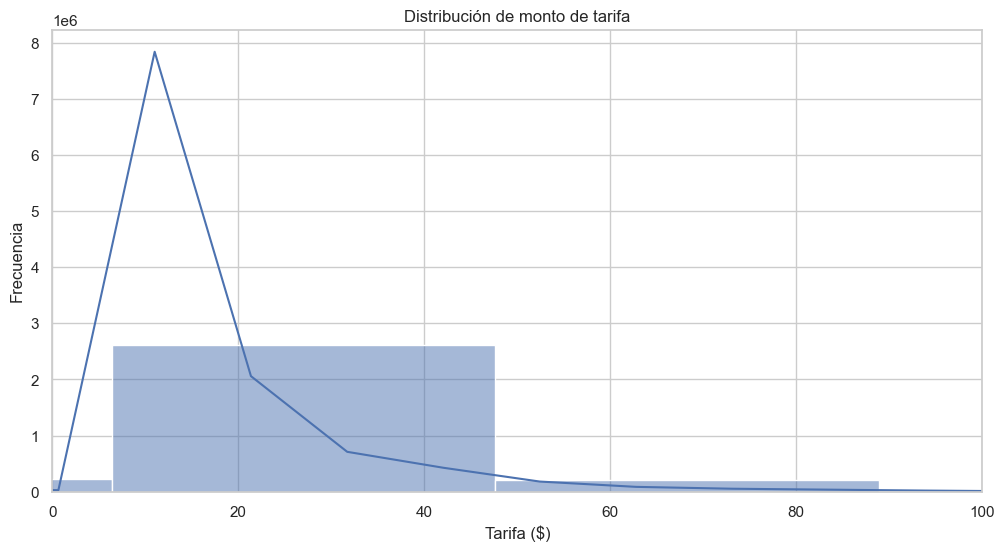

In [10]:
# --- Análisis univariado: fare_amount ---
print("Descripción estadística de 'fare_amount':")
print(df['fare_amount'].describe())

# Histograma de tarifas
plt.figure()
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribución de monto de tarifa")
plt.xlabel("Tarifa ($)")
plt.ylabel("Frecuencia")
plt.xlim(0, 100)
plt.show()


Celda 3: Análisis de tip_amount

Descripción estadística de 'tip_amount':
count    3.066766e+06
mean     3.367941e+00
std      3.826759e+00
min     -9.622000e+01
25%      1.000000e+00
50%      2.720000e+00
75%      4.200000e+00
max      3.808000e+02
Name: tip_amount, dtype: float64


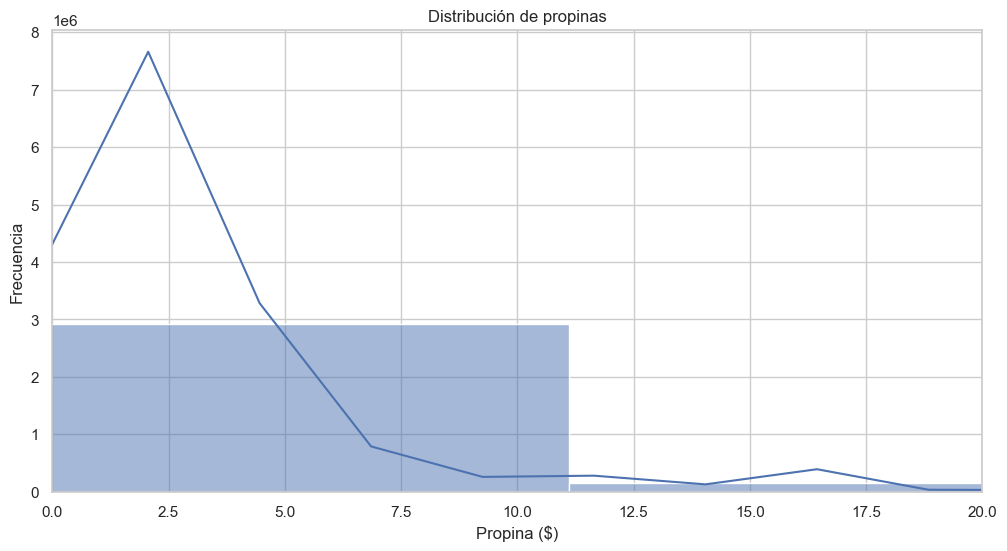

In [11]:
# --- Análisis univariado: tip_amount ---
print("Descripción estadística de 'tip_amount':")
print(df['tip_amount'].describe())

# Histograma de propinas
plt.figure()
sns.histplot(df['tip_amount'], bins=40, kde=True)
plt.title("Distribución de propinas")
plt.xlabel("Propina ($)")
plt.ylabel("Frecuencia")
plt.xlim(0, 20)
plt.show()


Celda 4: Análisis de passenger_count

Frecuencia de pasajeros por viaje:
passenger_count
1.0    2261400
2.0     451536
3.0     106353
4.0      53745
0.0      51164
5.0      42681
6.0      28124
8.0         13
7.0          6
9.0          1
Name: count, dtype: int64


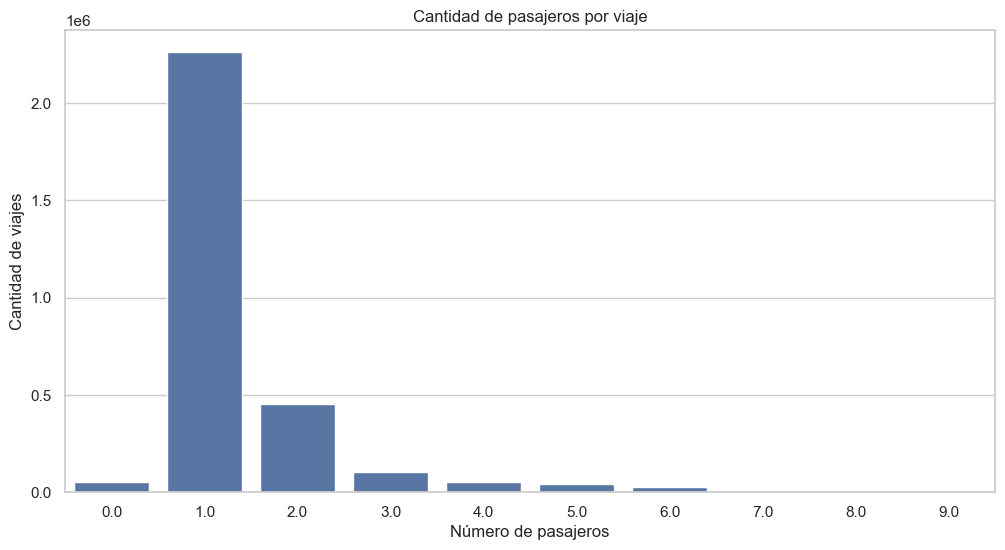

In [12]:
# --- Análisis univariado: passenger_count ---
print("Frecuencia de pasajeros por viaje:")
print(df['passenger_count'].value_counts())

# Gráfico de barras
plt.figure()
sns.countplot(data=df, x='passenger_count')
plt.title("Cantidad de pasajeros por viaje")
plt.xlabel("Número de pasajeros")
plt.ylabel("Cantidad de viajes")
plt.show()


*Limpieza del Dataset*

In [13]:
# Ver cantidad de nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con nulos en columnas clave
df = df.dropna(subset=['trip_distance', 'fare_amount', 'passenger_count'])
print("✅ Filas con nulos eliminadas.")


Valores nulos por columna:
VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          71743
trip_distance                0
RatecodeID               71743
store_and_fwd_flag       71743
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     71743
airport_fee              71743
dtype: int64
✅ Filas con nulos eliminadas.


*Corregir tipos de datos (fechas)*

In [14]:
# Convertir columnas de fecha
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

print("✅ Columnas de fecha convertidas.")


✅ Columnas de fecha convertidas.


*Filtrar valores extremos (outliers)*
Vamos a eliminar:
-Distancias negativas o ridículamente altas
-Tarifas negativas o muy elevadas
-Propinas negativas
-Cantidad de pasajeros inválida (0 o más de 7)

In [15]:
# Condiciones para filtrar datos inválidos
df = df[df['trip_distance'].between(0.1, 50)]
df = df[df['fare_amount'].between(1, 250)]
df = df[df['tip_amount'].between(0, 100)]
df = df[df['passenger_count'].between(1, 7)]

print("✅ Outliers eliminados.")
print("Dataset limpio - nuevo shape:", df.shape)


✅ Outliers eliminados.
Dataset limpio - nuevo shape: (2877471, 19)


*Eliminar columnas innecesarias*

In [16]:
print(df.columns.tolist())


['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [17]:
cols_to_drop = [
    'VendorID', 'store_and_fwd_flag', 'RatecodeID', 'Extra',
    'mta_tax', 'improvement_surcharge', 'congestion_surcharge',
    'airport_fee'
]

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
print("✅ Columnas innecesarias eliminadas.")


✅ Columnas innecesarias eliminadas.


*Guardar el dataset limpio*

In [19]:
# Guardar dataset limpio en nueva carpeta
df.to_csv("C:/Users/nazar/OneDrive/Documentos/EDA/yellow_trip_cleaned.csv", index=False)
print("✅ Dataset limpio guardado como yellow_trip_cleaned.csv")


✅ Dataset limpio guardado como yellow_trip_cleaned.csv
